# Método das Diferenças Finitas

## Introdução:

Este notebook foi dedicado à resolução dos seguintes problemas:

##### a) Equação do calor:

$$u_t=\kappa u_{xx},$$

sendo $0 \le x \le 1$ e $0 \le t \le 1$, em que $\kappa=0.5$, $u(x,0)=x(1-x)^2$, $u(0,t) = 0$ e $u(1,t)=0$

##### b) Equação de advecção:

$u_t+\mu u_x=0,$

sendo $0 \le x \le 1$ e $0 \le t \le 1$, em que $\mu=0.25$, $u(x,0)=\eta (x)=x(1-x)$ e $u(x,t) =\eta (x-\mu t)$

## Código:

In [6]:
# Importações:
import numpy as np
import matplotlib.pyplot as plt

Começando pelo problema a) Equação do calor:

In [7]:
# ---------- Definindo parâmetros:
kappa  = 0.5 # Valor definido de kappa

# ---------- Definindo variáveis úteis:
i = 100 # Define o número de pontos no eixo x
j = 100 # Define o número de pontos no eixo t

p = 1/i # Representa o "passo" na variável x; outro nome para dx
h = 1/j # Representa o "passo" na variável t; outro nome para dt

mu = (2 * h * kappa)/(p**2) # Definindo uma variável mu para facilitar as iterações

# ---------- Definindo os eixos:
x = np.linspace(0, 1, i+1) # Define x como um espaço de 0 a 1 com i partições
# (e, portanto, passo p)
t = np.linspace(0, 1, j+1) # Define t como um espaço de 0 a 1 com j partições
# (e, portanto, passo h)

U = np.zeros((i+1, j+1)) # Define a função u(x, t) como uma matriz de zeros U[i,j]

# ---------- Definindo os valores de condição inicial:
U[:, 0] = x * (1 - x)**2 # Define todos os valores U[i,0] como a função de condição
# inicial dada no enunciado

# Realizando as iterações para descobrir os valores de U:
for j_atual in range(j): # Para cada j
    for i_atual in range(1, i): # Para cada i
        U[i_atual, j_atual+1] = U[i_atual, j_atual] + mu * (U[i_atual+1, j_atual] -2 * U[i_atual,j_atual] + U[i_atual-1, j_atual])
        # Explicação no markdown abaixo

A última linha do código acima corresponde à iteração
$$U_{i,j+1} = U_{i,j} + \mu (U_{i+1, j} - 2U_{i, j} + U_{i-1, j}),$$
para cada $i$ e $j$, considerando uma variável
$$\mu = \frac{2h\kappa}{p^2}$$
para facilitar a implementação do código.

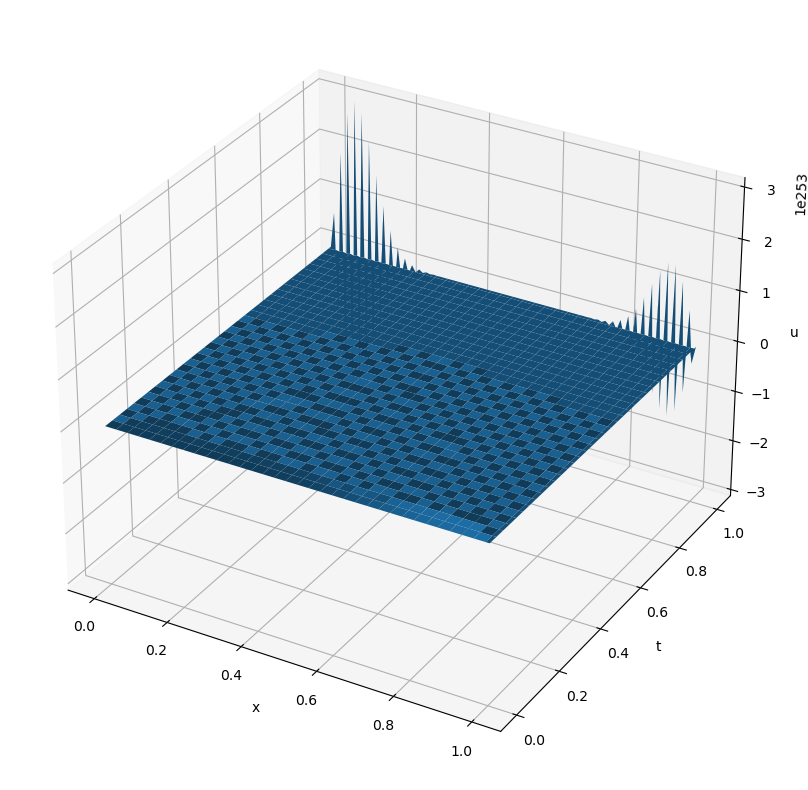

In [8]:
# ---------- Plotando o gráfico:
X, T = np.meshgrid(x, t) # Criando uma mesh para a plotagem

# Detalhes de sintaxe da biblioteca matplotlib.pyplot (ou plt):
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d') # Definindo o gráfico tridimensional
ax.plot_surface(X, T, U.T)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()

Repetindo o processo para o problema b) Equação de advecção:

In [9]:
# ---------- Definindo parâmetros:
mu  = 0.25 # Valor definido de mu

# ---------- Definindo variáveis úteis:
i = 100 # Define o número de pontos no eixo x
j = 100 # Define o número de pontos no eixo t

p = 1/i # Representa o "passo" na variável x; outro nome para dx
h = 1/j # Representa o "passo" na variável t; outro nome para dt

# ---------- Definindo os eixos:
x = np.linspace(0, 1, i+1) # Define x como um espaço de 0 a 1 com i partições
# (e, portanto, passo p)
t = np.linspace(0, 1, j+1) # Define t como um espaço de 0 a 1 com j partições
# (e, portanto, passo h)

U = np.zeros((i+1, j+1)) # Define a função u(x, t) como uma matriz de zeros U[i,j]

# ---------- Definindo os valores de condição inicial:
U[:, 0] = x * (1 - x) # Define todos os valores U[i,0] como a função de condição
# inicial dada no enunciado

# Realizando as iterações para descobrir os valores de U:
for j_atual in range(j): # Para cada j
    for i_atual in range(1, i): # Para cada i
        U[i_atual, j_atual+1] = U[i_atual, j_atual] + mu * (U[i_atual+1, j_atual] -2 * U[i_atual,j_atual] + U[i_atual-1, j_atual])
        # Explicação no markdown abaixo

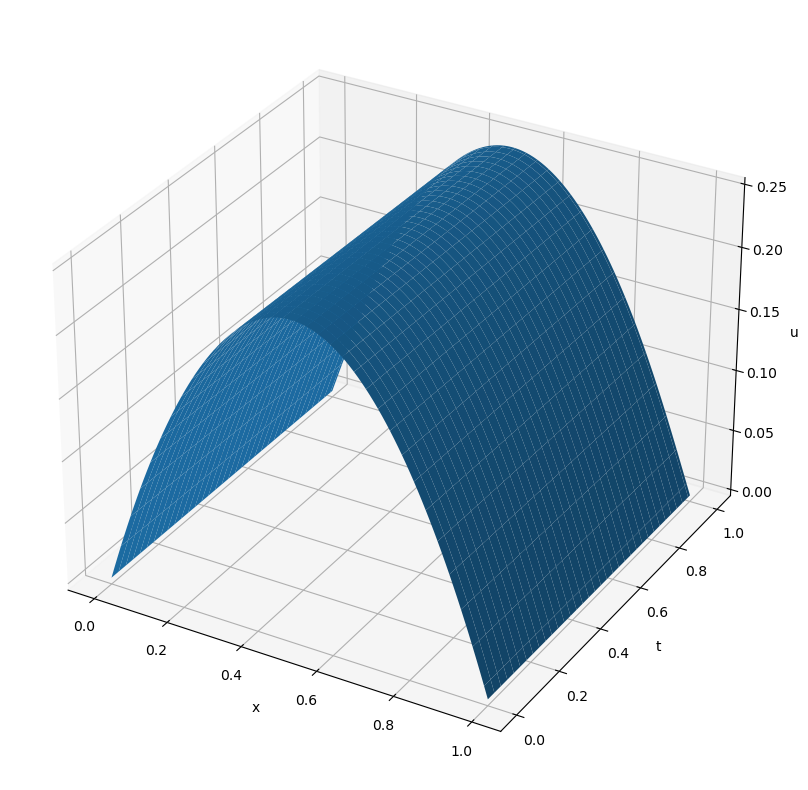

In [10]:
# ---------- Plotando o gráfico:
X, T = np.meshgrid(x, t) # Criando uma mesh para a plotagem

# Detalhes de sintaxe da biblioteca matplotlib.pyplot (ou plt):
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d') # Definindo o gráfico tridimensional
ax.plot_surface(X, T, U.T)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()